# Employee Turnover (Predictive Analysis)

**Tech innovations Inc.** is a leading technology company at the forefront of digital transformation and innovation. The organization is experiencing high turnover rates and struggles to attract and retain top talent in key positions. The objective of this project is to leverage HR data and advanced analytics to develop predictive models and actionable insights that will enhance employee recruitment and retention strategies. The following steps were taken;

1. Data Loading and Data Cleaning
   - Load Data
   - Clean Data
   
2. Exploratory Data Analysis
   - Univariate Data Analysis
   - Bivariate Data Analysis
   - Multivariate Data Analysis
   
3. Data Preprocessing
   - Label Encoding
   - Data Standardization
   
4. Machine Learning (Supervised)
      - Model Training: Trained Four ML Models; Random Forest, Decision Tree, SVM, Logistic Regression
      - Model Prediction
      - Model Evaluation
      - Model Optimization
          - Feature Importance
          - Hyperparameters and Gridsearch
          - Ensemble Method: Combining all four models


In [3]:
# import necessary Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load Dataset
data = pd.read_csv(r"C:\Users\BUYPC COMPUTERS\Desktop\10Alytics\Course\Project\Internship\Employee Turnover\Tech_hr_data.csv")

data.head()

Employee_ID  Age  Gender Department    Position  Tenure  Performance_Rating  \
0     EMP0001   60    Male  Marketing    Engineer      24                   2   
1     EMP0002   50    Male  Marketing  Specialist      28                   2   
2     EMP0003   36  Female    Finance     Analyst      18                   4   
3     EMP0004   64    Male    Finance     Manager       3                   4   
4     EMP0005   29  Female  Marketing     Manager      22                   3   

   Salary  Recruitment_Source  Satisfaction_Score  Last_Promotion_Years  \
0   80818  Campus Recruitment                 1.9                     7   
1   59932  Campus Recruitment                 4.5                     4   
2   36901           Job Board                 3.7                     0   
3   38597  Campus Recruitment                 2.2                     7   
4   93909  Campus Recruitment                 2.1                     8   

   Work_Life_Balance  Overworked  Job_Satisfaction  Distance_From_Work  \
0                  3           1                 4                  26   
1                  4           0                 2                  26   
2                  1           0                 5                  18   
3                  4           1                 3                  32   
4                  4           0                 2                  14   

   Commute_Time  Number_Of_Promotions  Turnover Turnover_Description  
0            78                     0         0            Retention  
1            30                     3         0            Retention  
2            86                     3         0            Retention  
3            28                     4         0            Retention  
4            45                     2         0            Retention

## Data Cleaning

In [4]:
# Check Data Information and Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_ID           1000 non-null   object 
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Department            1000 non-null   object 
 4   Position              1000 non-null   object 
 5   Tenure                1000 non-null   int64  
 6   Performance_Rating    1000 non-null   int64  
 7   Salary                1000 non-null   int64  
 8   Recruitment_Source    1000 non-null   object 
 9   Satisfaction_Score    1000 non-null   float64
 10  Last_Promotion_Years  1000 non-null   int64  
 11  Work_Life_Balance     1000 non-null   int64  
 12  Overworked            1000 non-null   int64  
 13  Job_Satisfaction      1000 non-null   int64  
 14  Distance_From_Work    1000 non-null   int64  
 15  Commute_Time          

In [5]:
data.shape

(1000, 19)

In [6]:
data.describe()

Age       Tenure  Performance_Rating         Salary  \
count  1000.000000  1000.000000         1000.000000    1000.000000   
mean     43.014000    14.443000            3.006000   74303.769000   
std      12.333772     8.567506            1.417029   26342.205416   
min      22.000000     0.000000            1.000000   30287.000000   
25%      32.000000     7.000000            2.000000   50912.500000   
50%      44.000000    14.000000            3.000000   74239.500000   
75%      54.000000    22.000000            4.000000   97722.500000   
max      64.000000    29.000000            5.000000  119959.000000   

       Satisfaction_Score  Last_Promotion_Years  Work_Life_Balance  \
count         1000.000000           1000.000000         1000.00000   
mean             3.485100              4.560000            2.94000   
std              0.979698              2.959249            1.45276   
min              0.500000              0.000000            1.00000   
25%              2.800000              2.000000            2.00000   
50%              3.500000              5.000000            3.00000   
75%              4.125000              7.000000            4.00000   
max              7.600000              9.000000            5.00000   

        Overworked  Job_Satisfaction  Distance_From_Work  Commute_Time  \
count  1000.000000       1000.000000          1000.00000    1000.00000   
mean      0.312000          3.049000            24.76600      51.92500   
std       0.463542          1.424299            13.89872      21.64088   
min       0.000000          1.000000             1.00000      15.00000   
25%       0.000000          2.000000            13.00000      33.00000   
50%       0.000000          3.000000            24.00000      52.00000   
75%       1.000000          4.000000            37.00000      71.00000   
max       1.000000          5.000000            49.00000      89.00000   

       Number_Of_Promotions    Turnover  
count           1000.000000  1000.00000  
mean               2.059000     0.19300  
std                1.431631     0.39485  
min                0.000000     0.00000  
25%                1.000000     0.00000  
50%                2.000000     0.00000  
75%                3.000000     0.00000  
max                4.000000     1.00000

In [7]:
# Check Missing Data

data.isnull().sum()

Employee_ID             0
Age                     0
Gender                  0
Department              0
Position                0
Tenure                  0
Performance_Rating      0
Salary                  0
Recruitment_Source      0
Satisfaction_Score      0
Last_Promotion_Years    0
Work_Life_Balance       0
Overworked              0
Job_Satisfaction        0
Distance_From_Work      0
Commute_Time            0
Number_Of_Promotions    0
Turnover                0
Turnover_Description    0
dtype: int64

In [13]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover', 'Turnover_Description'],
      dtype='object')

In [12]:
# Grouping Data into Categorical and Numerical

catdata = data[['Gender', 'Department', 'Position', 'Recruitment_Source','Turnover_Description']]
catdata

numdata = data[['Age','Performance_Rating','Salary', 'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions','Turnover']]

In [9]:
catdata.describe()

Gender Department    Position  Recruitment_Source Turnover_Description
count    1000       1000        1000                1000                 1000
unique      2          4           4                   3                    2
top      Male  Marketing  Specialist  Campus Recruitment            Retention
freq      518        271         277                 335                  807

In [10]:
numdata.describe()

Age  Performance_Rating         Salary  Satisfaction_Score  \
count  1000.000000         1000.000000    1000.000000         1000.000000   
mean     43.014000            3.006000   74303.769000            3.485100   
std      12.333772            1.417029   26342.205416            0.979698   
min      22.000000            1.000000   30287.000000            0.500000   
25%      32.000000            2.000000   50912.500000            2.800000   
50%      44.000000            3.000000   74239.500000            3.500000   
75%      54.000000            4.000000   97722.500000            4.125000   
max      64.000000            5.000000  119959.000000            7.600000   

       Last_Promotion_Years  Work_Life_Balance   Overworked  Job_Satisfaction  \
count           1000.000000         1000.00000  1000.000000       1000.000000   
mean               4.560000            2.94000     0.312000          3.049000   
std                2.959249            1.45276     0.463542          1.424299   
min                0.000000            1.00000     0.000000          1.000000   
25%                2.000000            2.00000     0.000000          2.000000   
50%                5.000000            3.00000     0.000000          3.000000   
75%                7.000000            4.00000     1.000000          4.000000   
max                9.000000            5.00000     1.000000          5.000000   

       Distance_From_Work  Commute_Time  Number_Of_Promotions    Turnover  
count          1000.00000    1000.00000           1000.000000  1000.00000  
mean             24.76600      51.92500              2.059000     0.19300  
std              13.89872      21.64088              1.431631     0.39485  
min               1.00000      15.00000              0.000000     0.00000  
25%              13.00000      33.00000              1.000000     0.00000  
50%              24.00000      52.00000              2.000000     0.00000  
75%              37.00000      71.00000              3.000000     0.00000  
max              49.00000      89.00000              4.000000     1.00000

In [3]:
# Check and Remove Outliers

numdata = data[['Age','Performance_Rating','Salary', 'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions']]

In [4]:
Q1 = numdata.quantile(0.25)
Q3 = numdata.quantile(0.75)
IQR = Q3 - Q1


In [5]:
outliers = ((numdata < (Q1 - 1.5 * IQR)) | (numdata > (Q3 + 1.5 * IQR)))
outliersrows = ((numdata < (Q1 - 1.5 * IQR)) | (numdata > (Q3 + 1.5 * IQR))).any(axis=1)
data[outliersrows]


Employee_ID  Age  Gender   Department    Position  Tenure  \
93      EMP0094   56    Male    Marketing    Engineer      18   
153     EMP0154   41  Female      Finance     Manager      28   
309     EMP0310   51  Female        Sales     Manager       4   
414     EMP0415   33  Female    Marketing     Analyst      18   
431     EMP0432   57    Male    Marketing    Engineer      14   
444     EMP0445   22    Male        Sales  Specialist      18   
474     EMP0475   56    Male        Sales    Engineer      28   
554     EMP0555   31    Male  Engineering     Manager       5   
559     EMP0560   61  Female      Finance     Manager      12   
757     EMP0758   52  Female      Finance     Analyst       5   
927     EMP0928   52  Female  Engineering    Engineer       8   
950     EMP0951   40  Female        Sales  Specialist       4   
983     EMP0984   36    Male      Finance  Specialist       3   

     Performance_Rating  Salary  Recruitment_Source  Satisfaction_Score  \
93                    1   87415           Job Board                 6.2   
153                   1  106384           Job Board                 0.6   
309                   2  102920           Job Board                 6.4   
414                   1  109235  Campus Recruitment                 6.6   
431                   3   61721  Campus Recruitment                 0.5   
444                   1  108916           Job Board                 6.5   
474                   4   69169   Internal Referral                 6.3   
554                   3  113829           Job Board                 0.8   
559                   4   75896           Job Board                 6.2   
757                   4   70542  Campus Recruitment                 6.7   
927                   2  112839   Internal Referral                 7.6   
950                   2  103373           Job Board                 6.2   
983                   1   47653  Campus Recruitment                 0.8   

     Last_Promotion_Years  Work_Life_Balance  Overworked  Job_Satisfaction  \
93                      7                  2           0                 2   
153                     3                  1           1                 2   
309                     6                  4           0                 4   
414                     0                  5           0                 1   
431                     3                  2           0                 3   
444                     7                  5           0                 3   
474                     5                  1           0                 1   
554                     6                  4           0                 2   
559                     6                  3           1                 1   
757                     5                  1           0                 3   
927                     3                  4           0                 2   
950                     0                  1           0                 5   
983                     9                  1           0                 3   

     Distance_From_Work  Commute_Time  Number_Of_Promotions  Turnover  \
93                   16            52                     4         1   
153                  32            65                     1         0   
309                  12            79                     2         0   
414                   6            50                     0         0   
431                  39            28                     1         0   
444                  24            79                     4         0   
474                  36            79                     1         0   
554                  37            49                     1         0   
559                  45            89                     4         0   
757                  25            75                     3         1   
927                  28            48                     4         0   
950                   9            45                     2         0   


In [6]:
outliers.sum()

Age                      0
Performance_Rating       0
Salary                   0
Satisfaction_Score      13
Last_Promotion_Years     0
Work_Life_Balance        0
Overworked               0
Job_Satisfaction         0
Distance_From_Work       0
Commute_Time             0
Number_Of_Promotions     0
dtype: int64

In [7]:
# Remove outliers (Satisfaction Score)

newdata = data[~outliersrows]
newdata

Employee_ID  Age  Gender   Department    Position  Tenure  \
0       EMP0001   60    Male    Marketing    Engineer      24   
1       EMP0002   50    Male    Marketing  Specialist      28   
2       EMP0003   36  Female      Finance     Analyst      18   
3       EMP0004   64    Male      Finance     Manager       3   
4       EMP0005   29  Female    Marketing     Manager      22   
..          ...  ...     ...          ...         ...     ...   
995     EMP0996   54  Female  Engineering  Specialist      24   
996     EMP0997   25    Male    Marketing     Manager      17   
997     EMP0998   43  Female  Engineering     Analyst      18   
998     EMP0999   23  Female  Engineering    Engineer      22   
999     EMP1000   31  Female  Engineering  Specialist      22   

     Performance_Rating  Salary  Recruitment_Source  Satisfaction_Score  \
0                     2   80818  Campus Recruitment                 1.9   
1                     2   59932  Campus Recruitment                 4.5   
2                     4   36901           Job Board                 3.7   
3                     4   38597  Campus Recruitment                 2.2   
4                     3   93909  Campus Recruitment                 2.1   
..                  ...     ...                 ...                 ...   
995                   3   88502   Internal Referral                 4.7   
996                   4   78849           Job Board                 3.5   
997                   5   56347           Job Board                 4.9   
998                   3   79056   Internal Referral                 3.3   
999                   4   93851           Job Board                 2.9   

     Last_Promotion_Years  Work_Life_Balance  Overworked  Job_Satisfaction  \
0                       7                  3           1                 4   
1                       4                  4           0                 2   
2                       0                  1           0                 5   
3                       7                  4           1                 3   
4                       8                  4           0                 2   
..                    ...                ...         ...               ...   
995                     7                  2           0                 1   
996                     7                  4           0                 4   
997                     5                  1           0                 4   
998                     9                  2           0                 5   
999                     8                  3           1                 3   

     Distance_From_Work  Commute_Time  Number_Of_Promotions  Turnover  \
0                    26            78                     0         0   
1                    26            30                     3         0   
2                    18            86                     3         0   
3                    32            28                     4         0   
4                    14            45                     2         0   
..                  ...           ...                   ...       ...   
995                  38            87                     1         1   
996                  30            76                     4         0   
997                  41            62                     1         1   
998                  30            18                     0         0   
999                  36            51                     3         0   

    Turnover_Description  
0              Retention  
1              Retention  
2              Retention  
3              Retention  
4              Retention  
..                   ...  
995             Turnover  
996            Retention  
997             Turnover  
998            Retention  
999            Retention  

[987 rows x 19 columns]

## Exploratory Data Analysis

### Univariate Analysis

In [5]:
countTurnover = data['Turnover'].value_counts()
countTurnover

0    807
1    193
Name: Turnover, dtype: int64

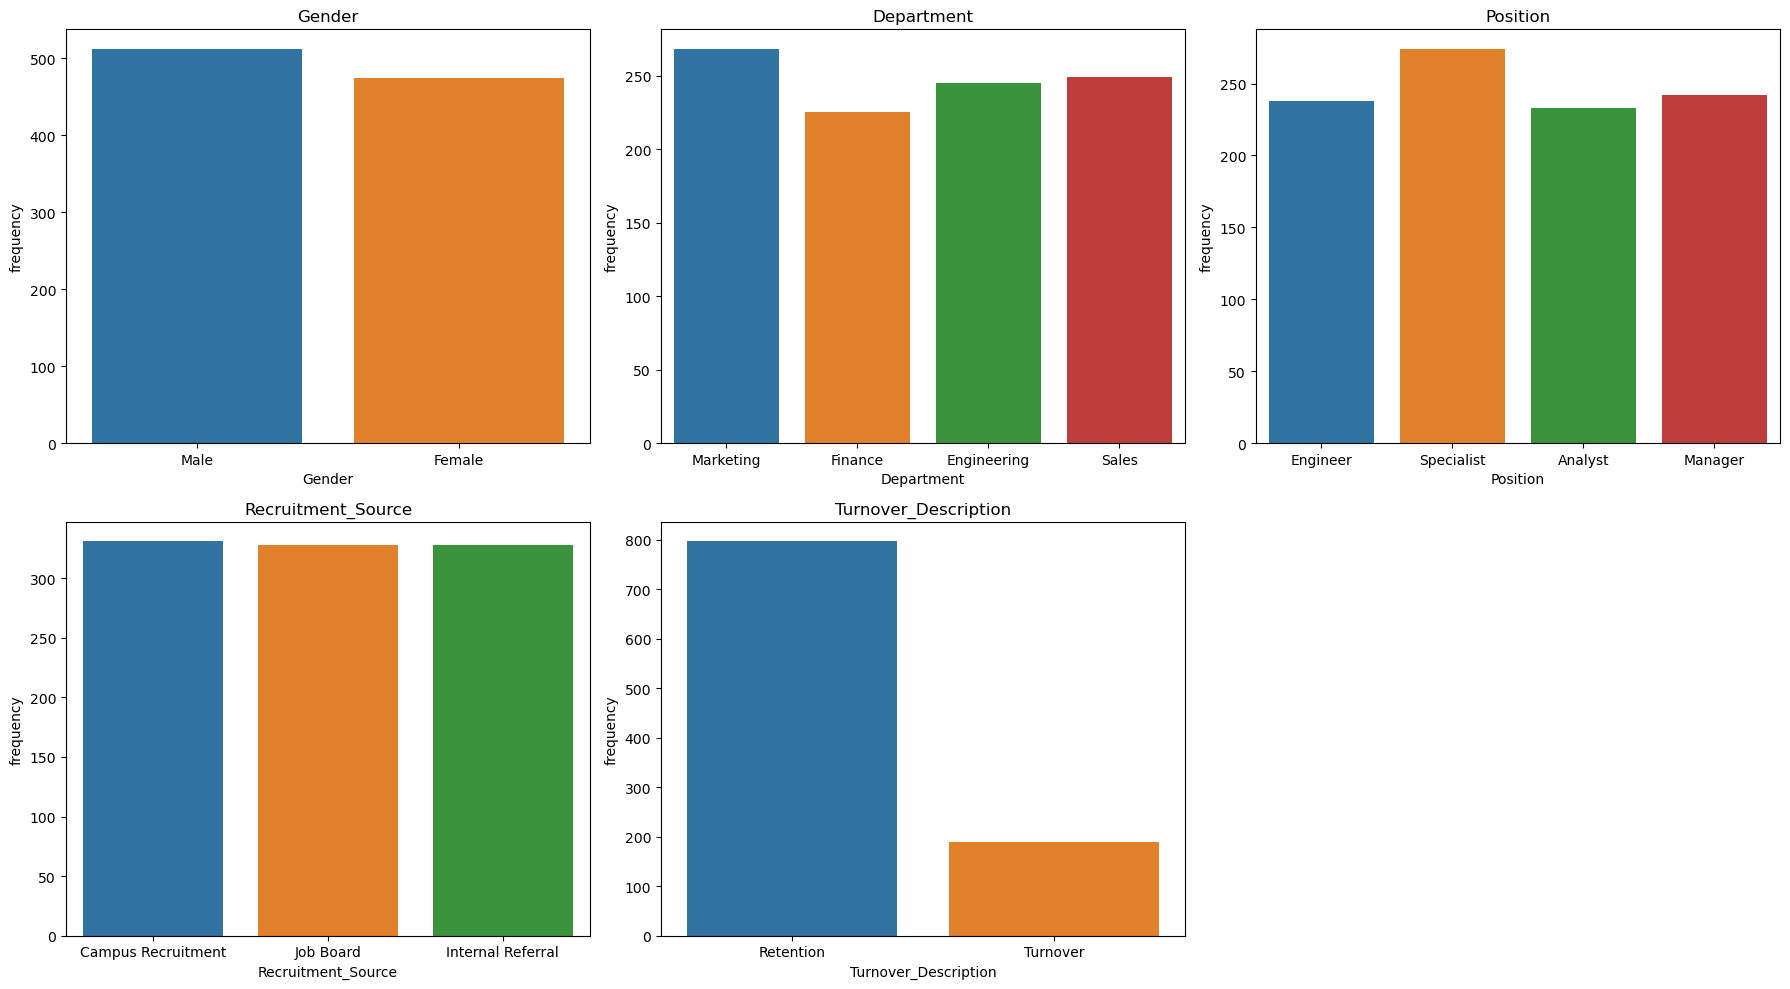

In [46]:
# Visualization of All Categorical Variables
plt.figure(figsize=(18,10))

for i, column in enumerate(catdata, 1):
    plt.subplot(2,3,i)
    sns.countplot(x = newdata[column], data=newdata)
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

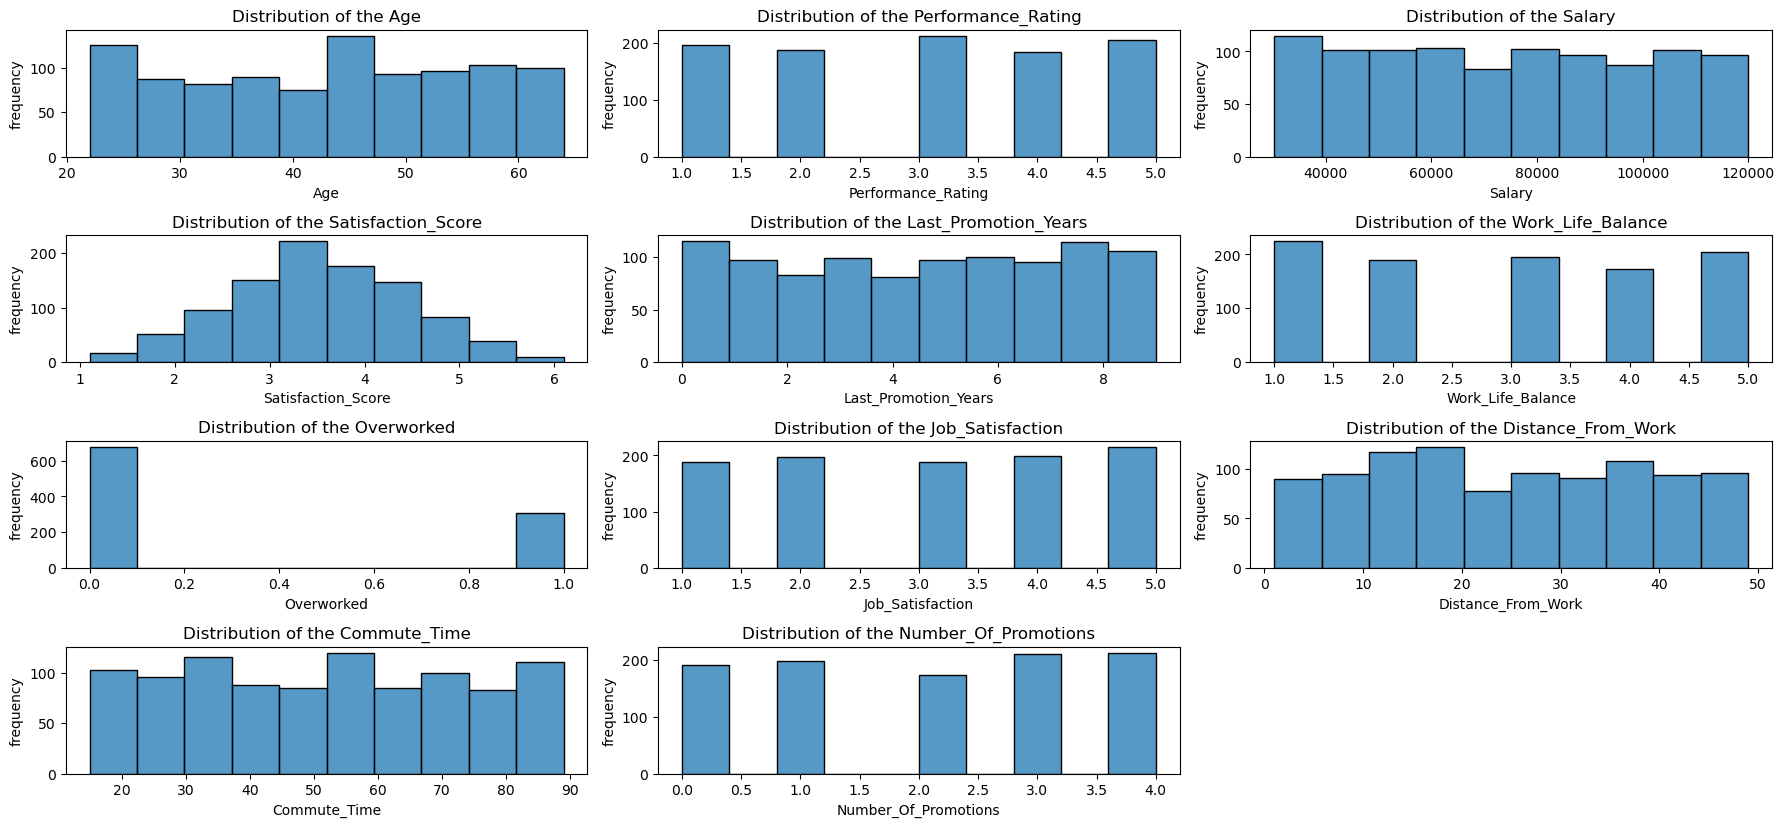

In [48]:
# Visualization of All Numeric Variables

plt.figure(figsize=(18,10))

for i, column in enumerate(numdata, 1):
    plt.subplot(5,3,i)
    sns.histplot(newdata[column], bins=10)
    plt.title(f'Distribution of the {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

**Narration**

In a workforce comprising 1000 employees, 807 employees remained loyal to the company while 193 employees decided to move on, marking a churn rate of approximately 19.3%. This data reflects a mix of stability and attrition within the organization. While the majority chose to stay, the departure of a significant portion of the workforce warrants attention to understand the underlying factors contributing to churn and implement strategies to mitigate it.

### Bivariate Analysis 

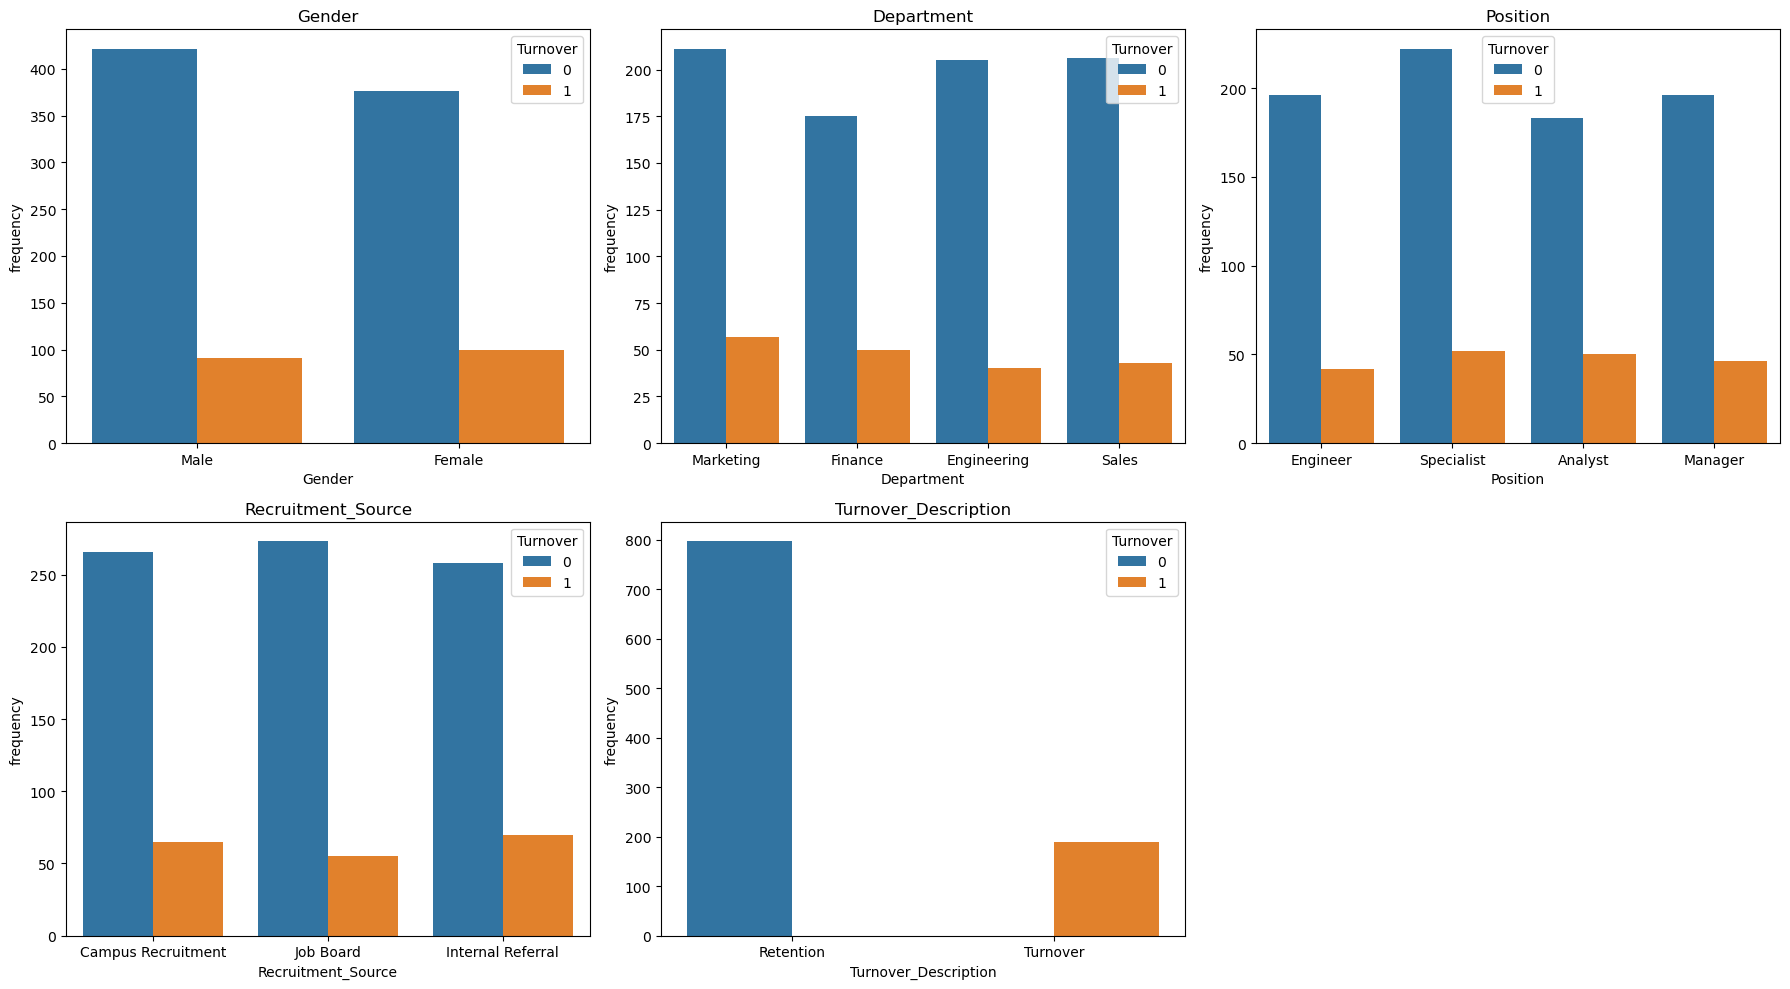

In [49]:
# Categorical Features

plt.figure(figsize=(18,10))

for i, column in enumerate(catdata, 1):
    plt.subplot(2,3,i)
    sns.countplot(x = newdata[column], data=newdata, hue='Turnover')
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

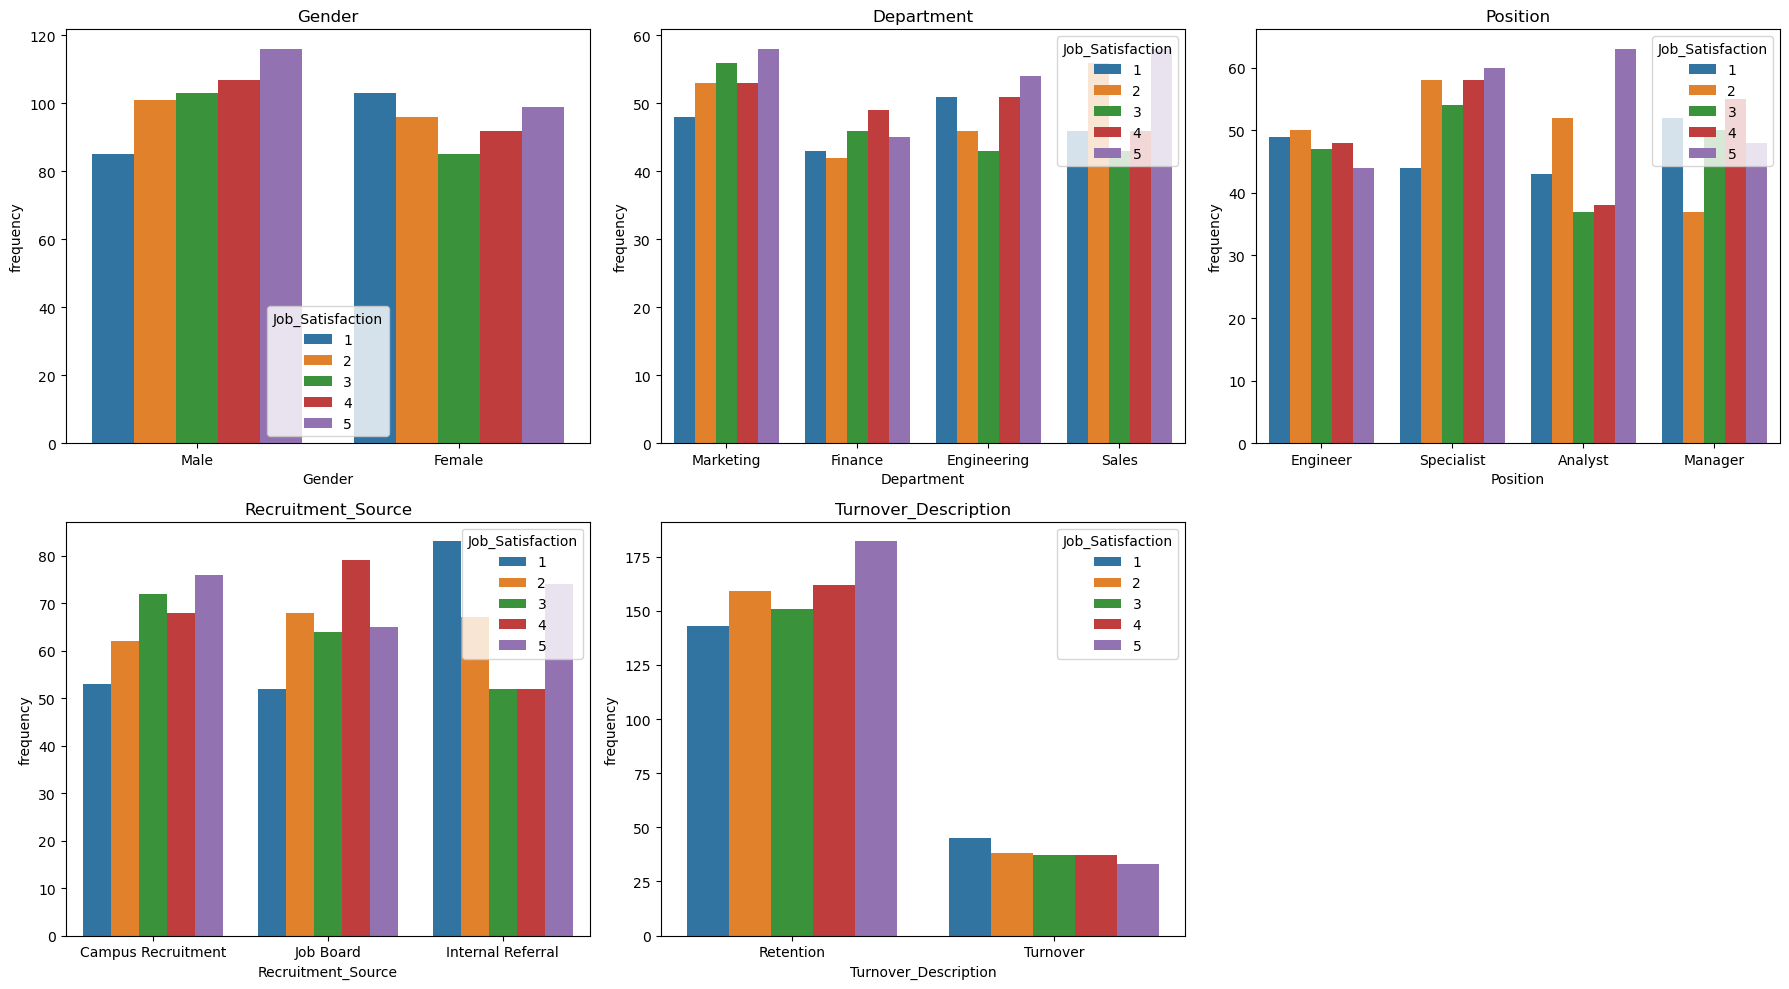

In [94]:
plt.figure(figsize=(18,10))

for i, column in enumerate(catdata, 1):
    plt.subplot(2,3,i)
    sns.countplot(x = newdata[column], data=newdata, hue='Job_Satisfaction')
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

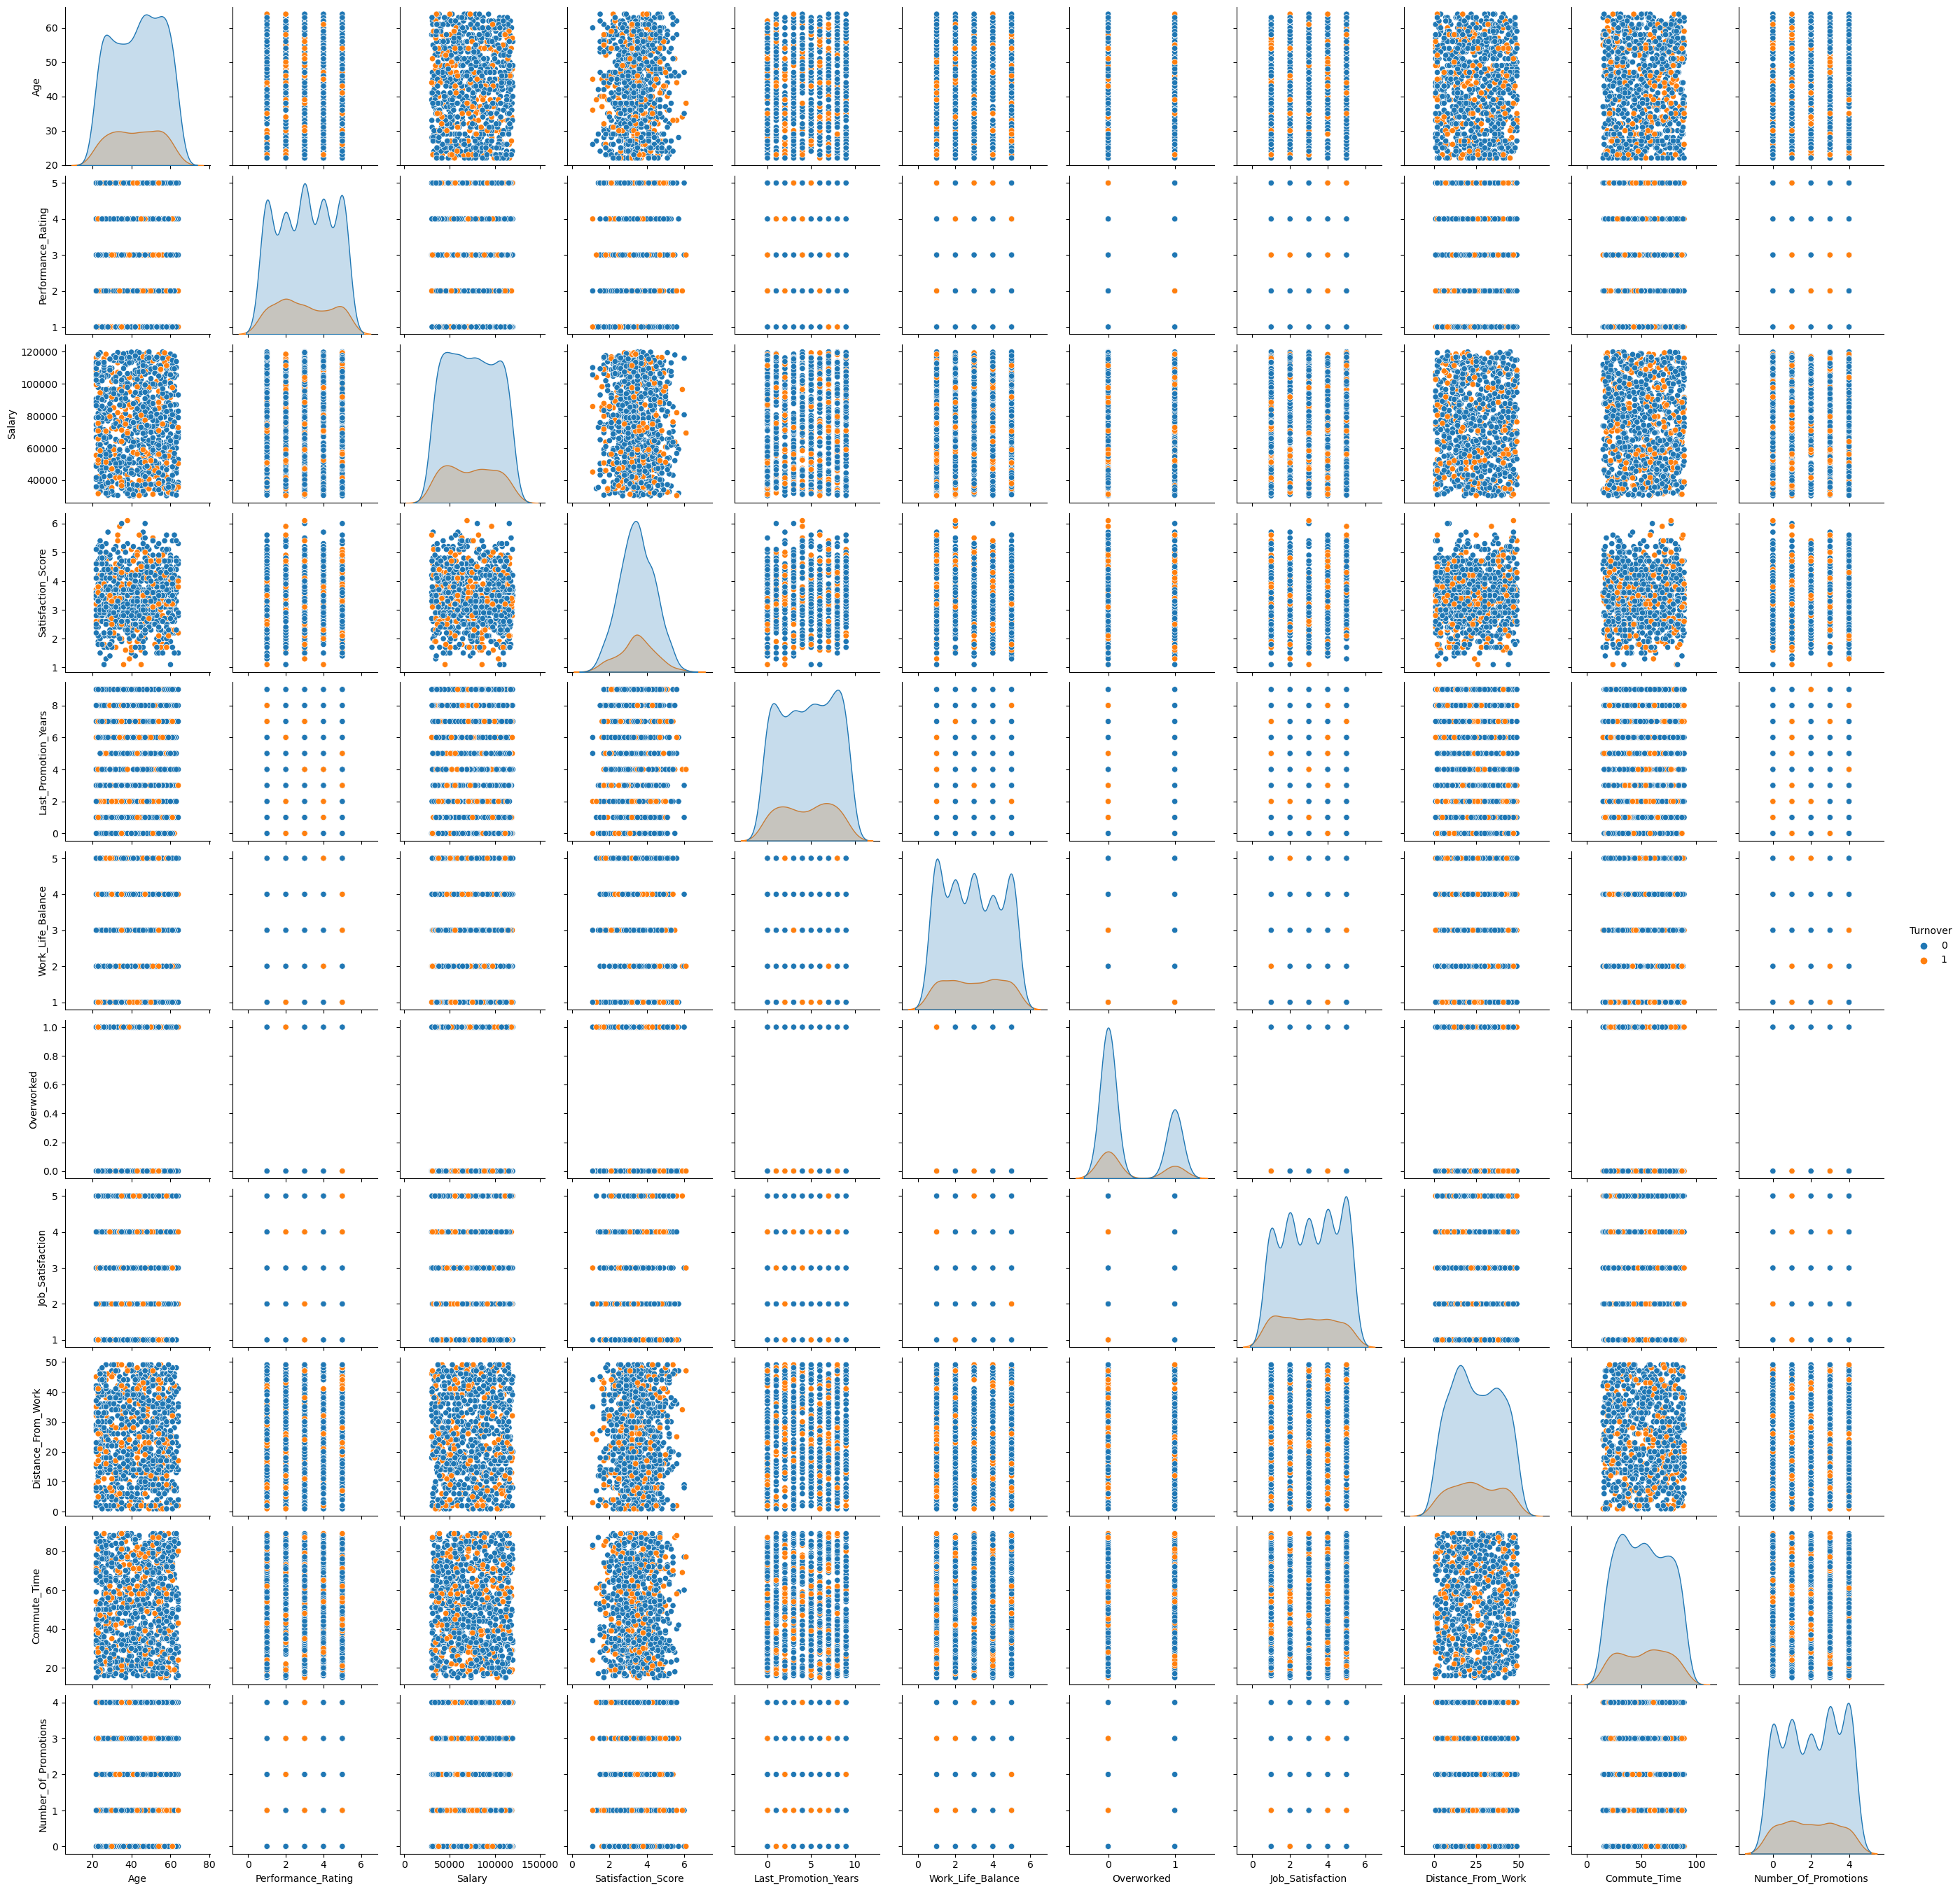

In [56]:
# Pairplot By Turnover

numcolumns = ['Age','Performance_Rating','Salary', 'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions','Turnover']
sns.pairplot(newdata[numcolumns], hue='Turnover')
plt.show()

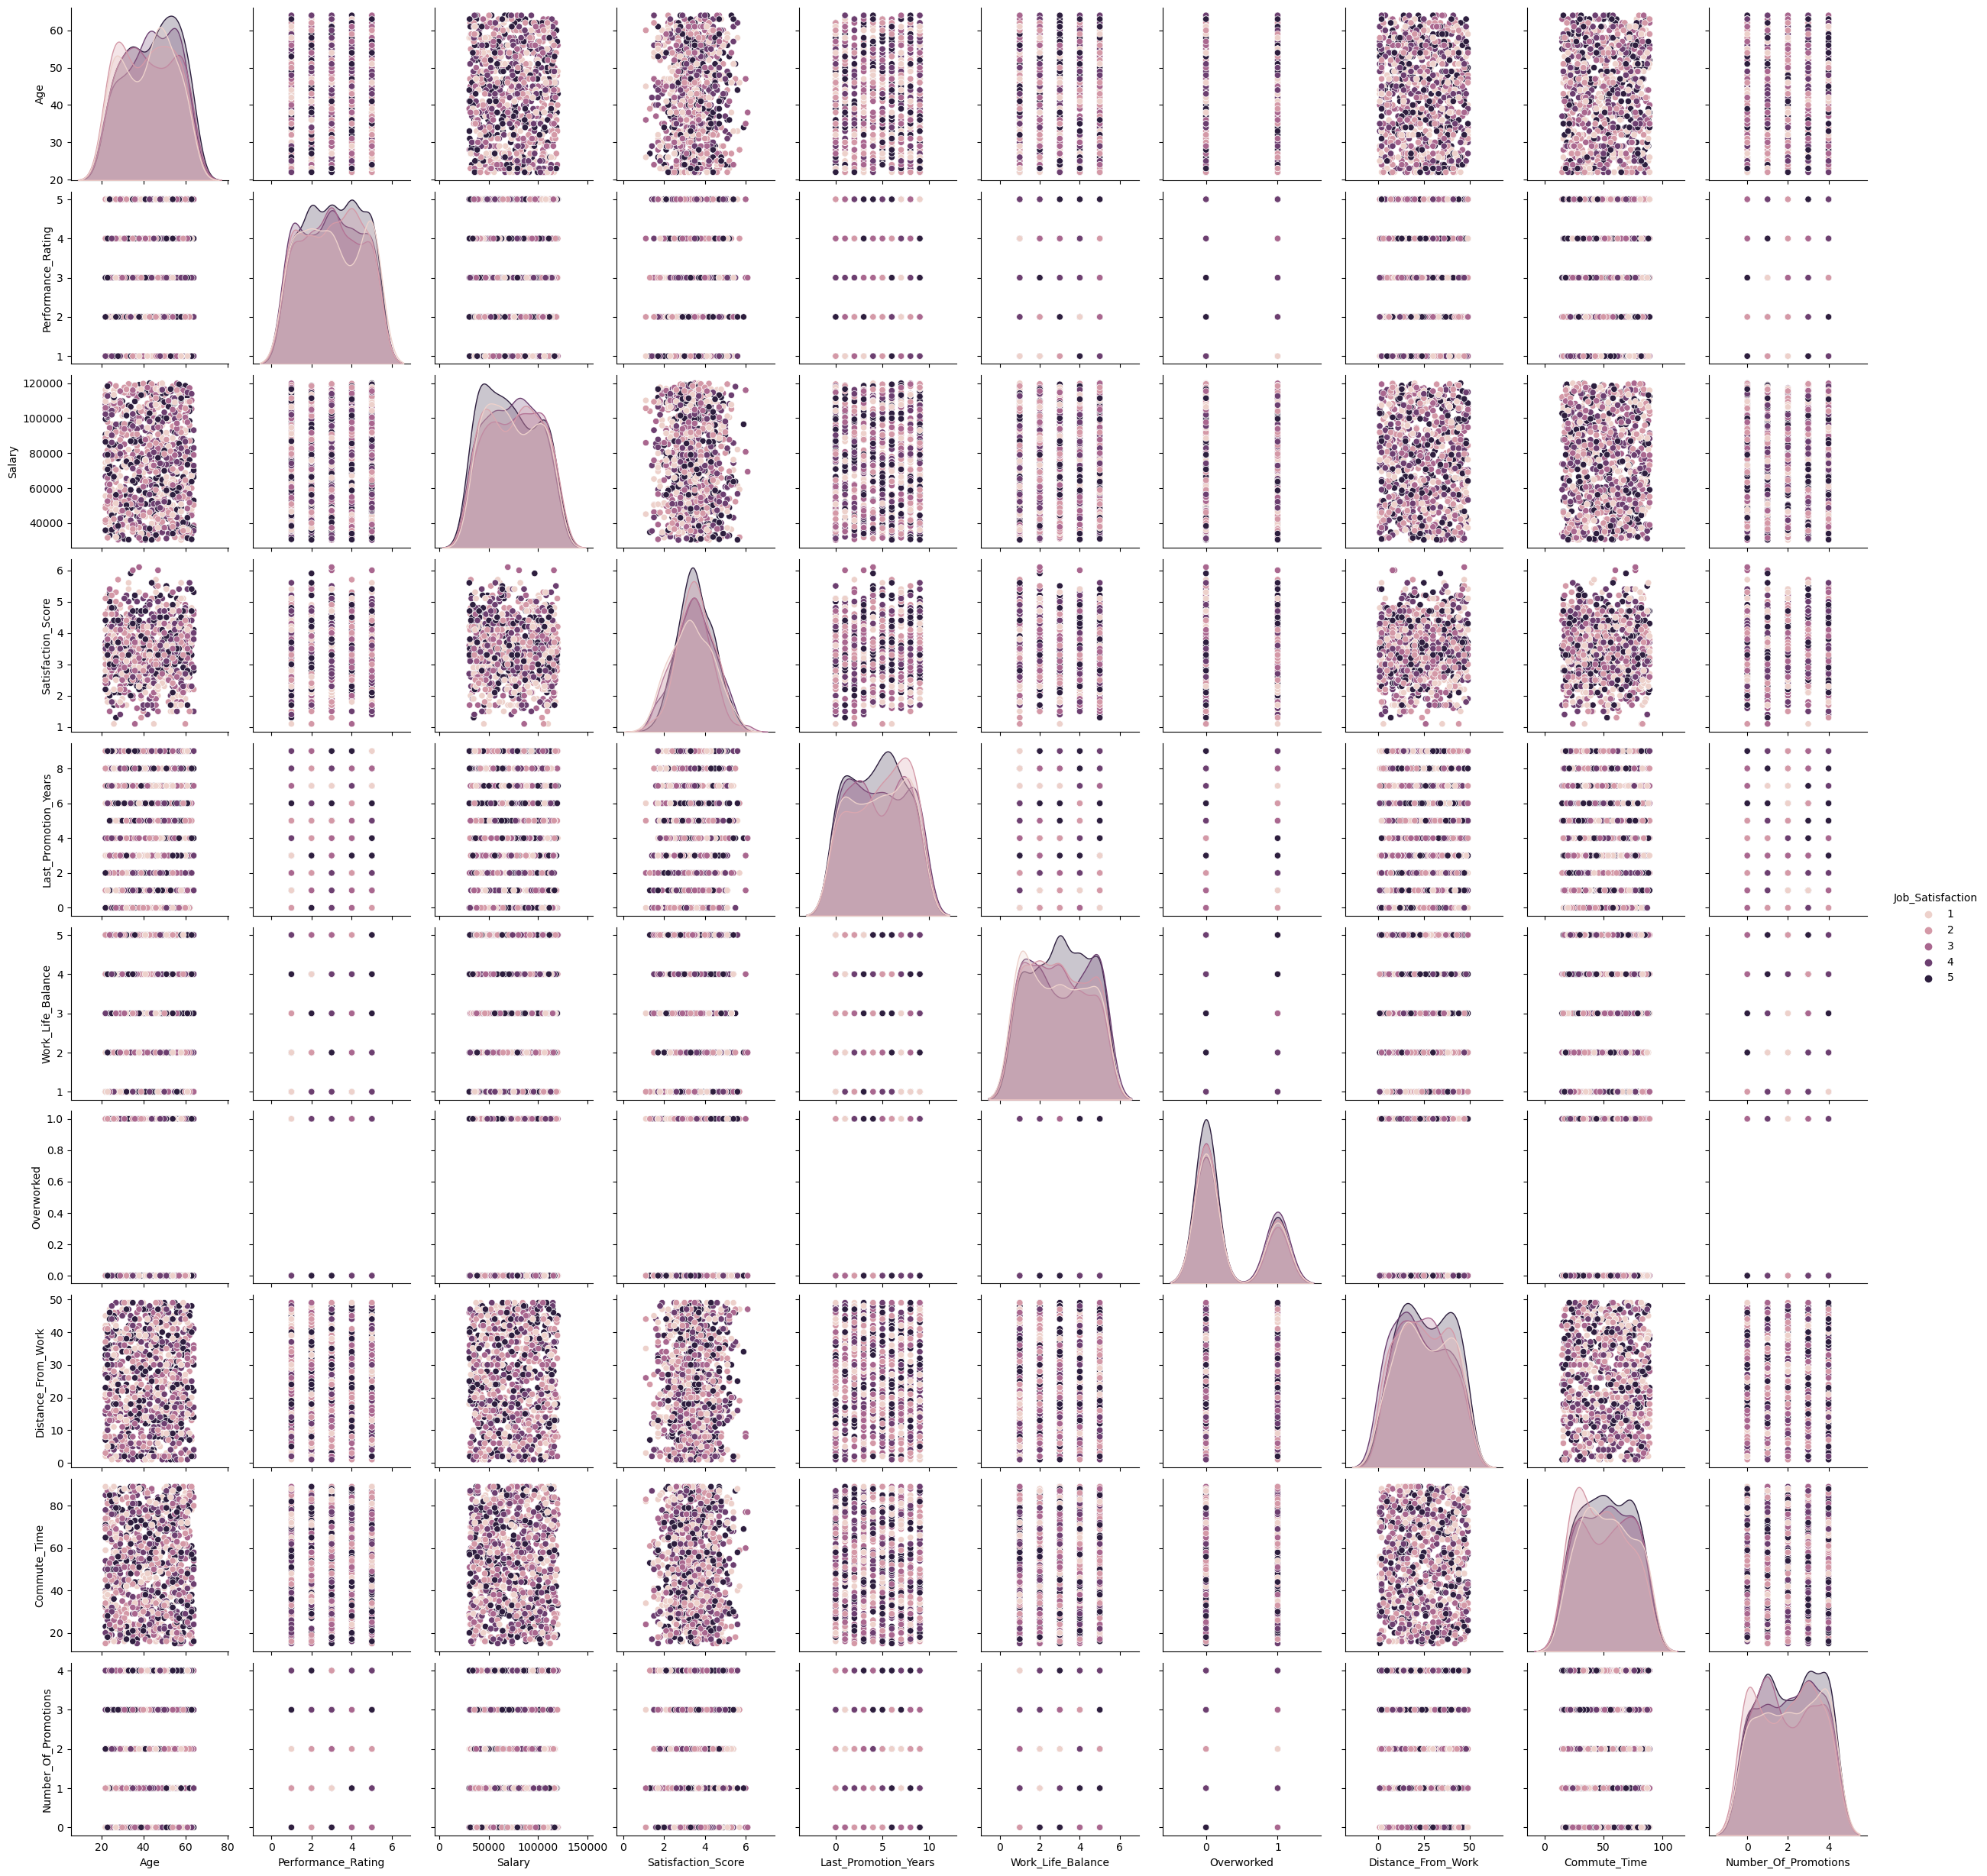

In [95]:
# Pairplot By Job Satisfaction

numcolumns = ['Age','Performance_Rating','Salary', 'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions']
sns.pairplot(newdata[numcolumns], hue='Job_Satisfaction')
plt.show()

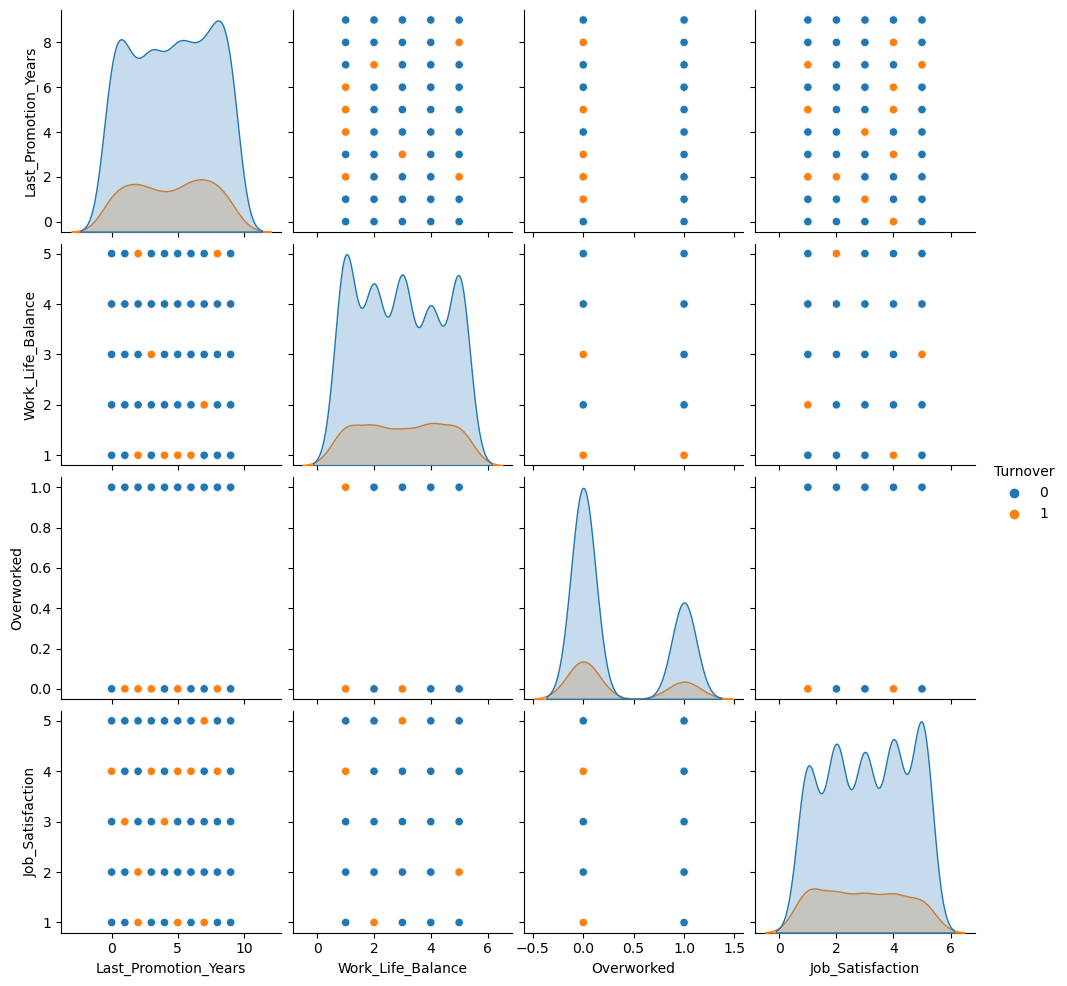

In [54]:
numcolumns = ['Last_Promotion_Years', 'Work_Life_Balance','Overworked', 'Job_Satisfaction', 'Turnover']
sns.pairplot(newdata[numcolumns], hue='Turnover')
plt.show()

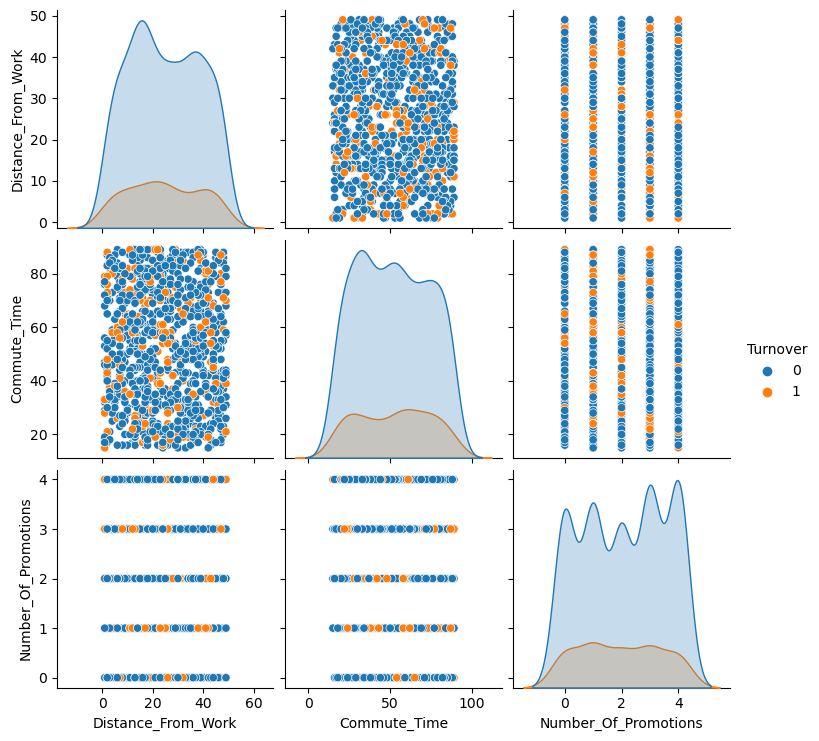

In [55]:
numcolumns = ['Distance_From_Work', 'Commute_Time','Number_Of_Promotions','Turnover']
sns.pairplot(newdata[numcolumns], hue='Turnover')
plt.show()

**Narration**

No Conclusive Trends/Data Pattern was found

### Multivariate Data Analysis

                           Age    Tenure  Performance_Rating    Salary  \
Age                   1.000000  0.014728           -0.032003 -0.017431   
Tenure                0.014728  1.000000            0.006646 -0.037457   
Performance_Rating   -0.032003  0.006646            1.000000 -0.015686   
Salary               -0.017431 -0.037457           -0.015686  1.000000   
Satisfaction_Score    0.038915  0.018991            0.042048 -0.023615   
Last_Promotion_Years -0.031159 -0.019186           -0.031865  0.056031   
Work_Life_Balance    -0.037828  0.028937            0.048287 -0.049122   
Overworked           -0.035448 -0.034796            0.035410 -0.008372   
Job_Satisfaction      0.075383  0.034949            0.007074 -0.034881   
Distance_From_Work   -0.006998  0.052589           -0.011060  0.007782   
Commute_Time         -0.004240 -0.055278           -0.055648  0.009341   
Number_Of_Promotions  0.008197 -0.057624            0.024032 -0.070947   
Turnover             -0.035861 -0.0160

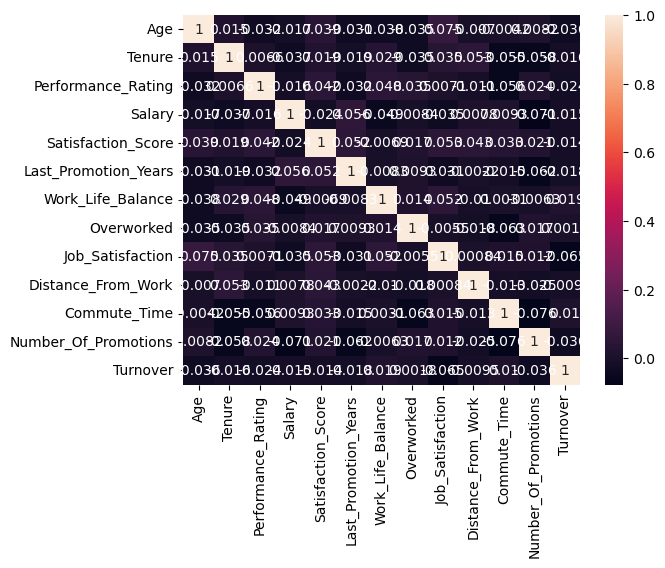

In [59]:
#Correlation

correlation_table = newdata.corr() 
print(correlation_table)

sns.heatmap(correlation_table, annot=True) 
plt.show()

**Narration**

No strong correlation

## Feature Engineering

In [10]:
Supervised_ML = newdata[['Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover']]
Supervised_ML

Age  Gender   Department    Position  Tenure  Performance_Rating  Salary  \
0     60    Male    Marketing    Engineer      24                   2   80818   
1     50    Male    Marketing  Specialist      28                   2   59932   
2     36  Female      Finance     Analyst      18                   4   36901   
3     64    Male      Finance     Manager       3                   4   38597   
4     29  Female    Marketing     Manager      22                   3   93909   
..   ...     ...          ...         ...     ...                 ...     ...   
995   54  Female  Engineering  Specialist      24                   3   88502   
996   25    Male    Marketing     Manager      17                   4   78849   
997   43  Female  Engineering     Analyst      18                   5   56347   
998   23  Female  Engineering    Engineer      22                   3   79056   
999   31  Female  Engineering  Specialist      22                   4   93851   

     Recruitment_Source  Satisfaction_Score  Last_Promotion_Years  \
0    Campus Recruitment                 1.9                     7   
1    Campus Recruitment                 4.5                     4   
2             Job Board                 3.7                     0   
3    Campus Recruitment                 2.2                     7   
4    Campus Recruitment                 2.1                     8   
..                  ...                 ...                   ...   
995   Internal Referral                 4.7                     7   
996           Job Board                 3.5                     7   
997           Job Board                 4.9                     5   
998   Internal Referral                 3.3                     9   
999           Job Board                 2.9                     8   

     Work_Life_Balance  Overworked  Job_Satisfaction  Distance_From_Work  \
0                    3           1                 4                  26   
1                    4           0                 2                  26   
2                    1           0                 5                  18   
3                    4           1                 3                  32   
4                    4           0                 2                  14   
..                 ...         ...               ...                 ...   
995                  2           0                 1                  38   
996                  4           0                 4                  30   
997                  1           0                 4                  41   
998                  2           0                 5                  30   
999                  3           1                 3                  36   

     Commute_Time  Number_Of_Promotions  Turnover  
0              78                     0         0  
1              30                     3         0  
2              86                     3         0  
3              28                     4         0  
4              45                     2         0  
..            ...                   ...       ...  
995            87                     1         1  
996            76                     4         0  
997            62                     1         1  
998            18                     0         0  
999            51                     3         0  

[987 rows x 17 columns]

In [11]:
Supervised_ML.columns

Index(['Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover'],
      dtype='object')

In [12]:
Supervised_ML['Years Since Last Promotion'] = Supervised_ML['Last_Promotion_Years'] * Supervised_ML['Number_Of_Promotions']
Supervised_ML['Work-Life Balance Score1'] = Supervised_ML['Satisfaction_Score'] * Supervised_ML['Work_Life_Balance']
Supervised_ML['Work-Life Balance Score2'] = Supervised_ML['Job_Satisfaction'] * Supervised_ML['Work_Life_Balance']
Supervised_ML['Overworked Indicator1'] = Supervised_ML['Satisfaction_Score'] * Supervised_ML['Overworked']
Supervised_ML['Overworked Indicator2'] = Supervised_ML['Job_Satisfaction'] * Supervised_ML['Overworked']
Supervised_ML['Commute Burden'] = Supervised_ML['Commute_Time'] * Supervised_ML['Distance_From_Work']
Supervised_ML['Promotion Rate'] = Supervised_ML['Number_Of_Promotions'] / Supervised_ML['Tenure']
Supervised_ML['Salary Satisfaction1'] = Supervised_ML['Satisfaction_Score'] * Supervised_ML['Salary']
Supervised_ML['Salary Satisfaction2'] = Supervised_ML['Job_Satisfaction'] * Supervised_ML['Salary']
Supervised_ML['Performance-Rating Ratio'] = Supervised_ML['Performance_Rating'] / Supervised_ML['Number_Of_Promotions']

Supervised_ML

Age  Gender   Department    Position  Tenure  Performance_Rating  Salary  \
0     60    Male    Marketing    Engineer      24                   2   80818   
1     50    Male    Marketing  Specialist      28                   2   59932   
2     36  Female      Finance     Analyst      18                   4   36901   
3     64    Male      Finance     Manager       3                   4   38597   
4     29  Female    Marketing     Manager      22                   3   93909   
..   ...     ...          ...         ...     ...                 ...     ...   
995   54  Female  Engineering  Specialist      24                   3   88502   
996   25    Male    Marketing     Manager      17                   4   78849   
997   43  Female  Engineering     Analyst      18                   5   56347   
998   23  Female  Engineering    Engineer      22                   3   79056   
999   31  Female  Engineering  Specialist      22                   4   93851   

     Recruitment_Source  Satisfaction_Score  Last_Promotion_Years  ...  \
0    Campus Recruitment                 1.9                     7  ...   
1    Campus Recruitment                 4.5                     4  ...   
2             Job Board                 3.7                     0  ...   
3    Campus Recruitment                 2.2                     7  ...   
4    Campus Recruitment                 2.1                     8  ...   
..                  ...                 ...                   ...  ...   
995   Internal Referral                 4.7                     7  ...   
996           Job Board                 3.5                     7  ...   
997           Job Board                 4.9                     5  ...   
998   Internal Referral                 3.3                     9  ...   
999           Job Board                 2.9                     8  ...   

     Years Since Last Promotion  Work-Life Balance Score1  \
0                             0                       5.7   
1                            12                      18.0   
2                             0                       3.7   
3                            28                       8.8   
4                            16                       8.4   
..                          ...                       ...   
995                           7                       9.4   
996                          28                      14.0   
997                           5                       4.9   
998                           0                       6.6   
999                          24                       8.7   

     Work-Life Balance Score2  Overworked Indicator1  Overworked Indicator2  \
0                          12                    1.9                      4   
1                           8                    0.0                      0   
2                           5                    0.0                      0   
3                          12                    2.2                      3   
4                           8                    0.0                      0   
..                        ...                    ...                    ...   
995                         2                    0.0                      0   
996                        16                    0.0                      0   
997                         4                    0.0                      0   
998                        10                    0.0                      0   
999                         9                    2.9                      3   

     Commute Burden  Promotion Rate  Salary Satisfaction1  \
0              2028        0.000000              153554.2   
1               780        0.107143              269694.0   
2              1548        0.166667              136533.7   
3               896        1.333333               84913.4   
4               630        0.090909              197208.9   
..              ...             ...                   ...   
995            3306        0.04166

## Data Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical column
le = LabelEncoder()

Supervised_ML["EncodedGender"] = le.fit_transform(Supervised_ML['Gender'])
Supervised_ML["EncodedDepartment"] = le.fit_transform(Supervised_ML['Department'])
Supervised_ML["EncodedPosition"] = le.fit_transform(Supervised_ML['Position'])
Supervised_ML["EncodedRecruitment_Source"] = le.fit_transform(Supervised_ML['Recruitment_Source'])


## Supervised Machine Learning

In [25]:
#Import All ML Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix

In [27]:
Supervised_ML.columns

Index(['Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover', 'Years Since Last Promotion',
       'Work-Life Balance Score1', 'Work-Life Balance Score2',
       'Overworked Indicator1', 'Overworked Indicator2', 'Commute Burden',
       'Promotion Rate', 'Salary Satisfaction1', 'Salary Satisfaction2',
       'Performance-Rating Ratio', 'EncodedGender', 'EncodedDepartment',
       'EncodedPosition', 'EncodedRecruitment_Source'],
      dtype='object')

In [62]:
Supervised_MLdata = Supervised_ML[['Age', 'EncodedGender', 'EncodedDepartment', 'EncodedPosition', 'Tenure',
       'Performance_Rating', 'Salary', 'EncodedRecruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Years Since Last Promotion',
       'Work-Life Balance Score1', 'Work-Life Balance Score2',
       'Overworked Indicator1', 'Overworked Indicator2', 'Commute Burden',
       'Promotion Rate', 'Salary Satisfaction1', 'Salary Satisfaction2',
       'Turnover' ]]
Supervised_MLdata

Age  EncodedGender  EncodedDepartment  EncodedPosition  Tenure  \
0     60              1                  2                1      24   
1     50              1                  2                3      28   
2     36              0                  1                0      18   
3     64              1                  1                2       3   
4     29              0                  2                2      22   
..   ...            ...                ...              ...     ...   
995   54              0                  0                3      24   
996   25              1                  2                2      17   
997   43              0                  0                0      18   
998   23              0                  0                1      22   
999   31              0                  0                3      22   

     Performance_Rating  Salary  EncodedRecruitment_Source  \
0                     2   80818                          0   
1                     2   59932                          0   
2                     4   36901                          2   
3                     4   38597                          0   
4                     3   93909                          0   
..                  ...     ...                        ...   
995                   3   88502                          1   
996                   4   78849                          2   
997                   5   56347                          2   
998                   3   79056                          1   
999                   4   93851                          2   

     Satisfaction_Score  Last_Promotion_Years  ...  \
0                   1.9                     7  ...   
1                   4.5                     4  ...   
2                   3.7                     0  ...   
3                   2.2                     7  ...   
4                   2.1                     8  ...   
..                  ...                   ...  ...   
995                 4.7                     7  ...   
996                 3.5                     7  ...   
997                 4.9                     5  ...   
998                 3.3                     9  ...   
999                 2.9                     8  ...   

     Years Since Last Promotion  Work-Life Balance Score1  \
0                             0                       5.7   
1                            12                      18.0   
2                             0                       3.7   
3                            28                       8.8   
4                            16                       8.4   
..                          ...                       ...   
995                           7                       9.4   
996                          28                      14.0   
997                           5                       4.9   
998                           0                       6.6   
999                          24                       8.7   

     Work-Life Balance Score2  Overworked Indicator1  Overworked Indicator2  \
0                          12                    1.9                      4   
1                           8                    0.0                      0   
2                           5                    0.0                      0   
3                          12                    2.2                      3   
4                           8                    0.0                      0   
..                        ...                    ...                    ...   
995                         2                    0.0                      0   
996                        16                    0.0                      0   
997                         4                    0.0                      0   
998                        10                    0.0                      0   
999                         9                    2.9                      3   

     Commute Burden  Promotion Rate  Salary Satisfaction1  \
0              

In [43]:
MLfeatures = Supervised_MLdata[['Age', 'EncodedGender', 'EncodedDepartment', 'EncodedPosition', 'Tenure',
       'Performance_Rating', 'Salary', 'EncodedRecruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Years Since Last Promotion',
       'Work-Life Balance Score1', 'Work-Life Balance Score2',
       'Overworked Indicator1', 'Overworked Indicator2', 'Commute Burden',
       'Salary Satisfaction1', 'Salary Satisfaction2']]

label = Supervised_MLdata[['Turnover']]

In [71]:
MLfeatures.columns

Index(['Age', 'EncodedGender', 'EncodedDepartment', 'EncodedPosition',
       'Tenure', 'Performance_Rating', 'Salary', 'EncodedRecruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions'],
      dtype='object')

In [44]:
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(MLfeatures, label, test_size=0.2, random_state=42)

In [45]:
# Standardize the features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [46]:
# Initialize and train the models
models = {"Decision Trees": DecisionTreeClassifier(random_state=42), 
         "Random Forests": RandomForestClassifier(random_state=42),
         "Logistic Regression": LogisticRegression(random_state=42), 
         "SVM" : SVC(random_state=42),
          "XG Boost": XGBClassifier(random_state=42),
          "SGD": SGDClassifier(random_state=42)          
}

Classification reports for Decision Trees are: 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       157
           1       0.21      0.29      0.25        41

    accuracy                           0.63       198
   macro avg       0.51      0.51      0.50       198
weighted avg       0.68      0.63      0.65       198
 

Classification reports for Random Forests are: 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.78       198
   macro avg       0.40      0.49      0.44       198
weighted avg       0.63      0.78      0.70       198
 

Classification reports for Logistic Regression are: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        41

    accuracy              

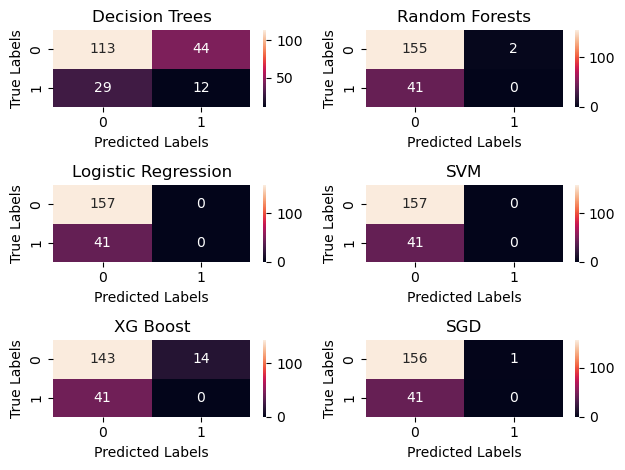

In [47]:
for i, (model_name, model) in enumerate(models.items(), 1):
    
    # Train the model
    model.fit(Xtrain_scaled, ytrain)

    # Prediction
    ypred = model.predict(Xtest_scaled)

    # Evaluation
    report = classification_report(ytest, ypred)
    matrix = confusion_matrix(ytest, ypred)

    plt.subplot(3,2, i)
    plt.title(f'{model_name}')
    sns.heatmap(matrix, annot=True, fmt="")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    print(f"Classification reports for {model_name} are: \n {report} \n")

plt.tight_layout()
plt.show()

**Narration**

We trained 6 models but Decision Tree gave the lowest accuracy but had performed best in terms of prediction, we proceeded to feature importance and selection in order to optimise data

### Feature Importance and Selection

In [49]:
selected_features = MLfeatures.columns
selected_features

Index(['Age', 'EncodedGender', 'EncodedDepartment', 'EncodedPosition',
       'Tenure', 'Performance_Rating', 'Salary', 'EncodedRecruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Years Since Last Promotion',
       'Work-Life Balance Score1', 'Work-Life Balance Score2',
       'Overworked Indicator1', 'Overworked Indicator2', 'Commute Burden',
       'Salary Satisfaction1', 'Salary Satisfaction2'],
      dtype='object')

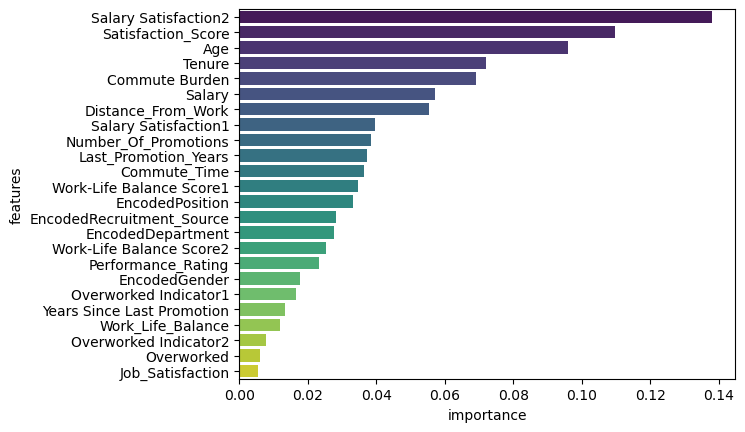

In [50]:
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
models['Decision Trees'].fit(Xtrain_scaled, ytrain)

# Get feature importances
feature_importance = models['Decision Trees'].feature_importances_
# feature_importance = models['Decision Trees'].feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'features': selected_features, 'importance':feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance
sns.barplot(x='importance', y='features', data=feature_importance_df, palette='viridis')
plt.show()

**Narration**

Selected the first six(6) features that contributed best to ML Model

In [51]:
MLfeatures = Supervised_MLdata[['Salary Satisfaction2','Satisfaction_Score', 'Commute Burden', 'Age', 'Tenure']]

label = Supervised_MLdata[['Turnover']]

In [52]:
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(MLfeatures, label, test_size=0.2, random_state=42)

In [53]:
# Standardize the features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [54]:
# Initialize and train the models
models = {"Decision Trees": DecisionTreeClassifier(random_state=42), 
         "Random Forests": RandomForestClassifier(random_state=42),
         "Logistic Regression": LogisticRegression(random_state=42), 
         "SVM" : SVC(random_state=42) 
}

Classification reports for Decision Trees are: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       157
           1       0.22      0.24      0.23        41

    accuracy                           0.66       198
   macro avg       0.51      0.51      0.51       198
weighted avg       0.68      0.66      0.67       198
 

Classification reports for Random Forests are: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       157
           1       0.14      0.02      0.04        41

    accuracy                           0.77       198
   macro avg       0.47      0.49      0.45       198
weighted avg       0.66      0.77      0.70       198
 

Classification reports for Logistic Regression are: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        41

    accuracy              

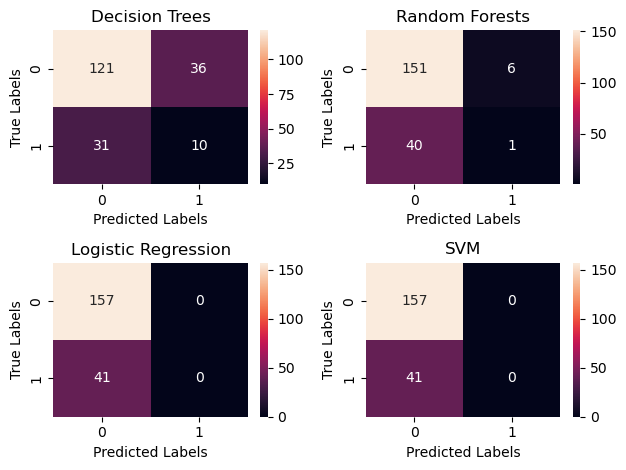

In [55]:
for i, (model_name, model) in enumerate(models.items(), 1):
    
    # Train the model
    model.fit(Xtrain_scaled, ytrain)

    # Prediction
    ypred = model.predict(Xtest_scaled)

    # Evaluation
    report = classification_report(ytest, ypred)
    matrix = confusion_matrix(ytest, ypred)

    plt.subplot(2,2, i)
    plt.title(f'{model_name}')
    sns.heatmap(matrix, annot=True, fmt="")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    print(f"Classification reports for {model_name} are: \n {report} \n")

plt.tight_layout()
plt.show()

**Narration**

Feature Importance did not change ML Model Performance, we then proceeded to optimize ML Model Using Hyperparameter

## Hyperparameter Optimization

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

In [58]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = models['Random Forests']

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(Xtrain_scaled, ytrain)

# Make predictions on the test set
y_pred = best_rf_model.predict(Xtest_scaled)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)
matrix = confusion_matrix(ytest, y_pred)

# Display results
print("### Best Random Forest Models ###")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
### Best Random Forest Models ###
Accuracy: 0.7778
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87       157
           1       0.00      0.00      0.00        41

    accuracy                           0.78       198
   macro avg       0.39      0.49      0.44       198
weighted avg       0.63      0.78      0.69       198

Confusion Matrix:
 [[154   3]
 [ 41   0]]


In [ ]:
 ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 
  'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 
  'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
### Best Decision Trees Models ###
Accuracy: 0.7071
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       157
           1       0.13      0.07      0.09        41

    accuracy                           0.71       198
   macro avg       0.46      0.47      0.46       198
weighted avg       0.65      0.71      0.67       198



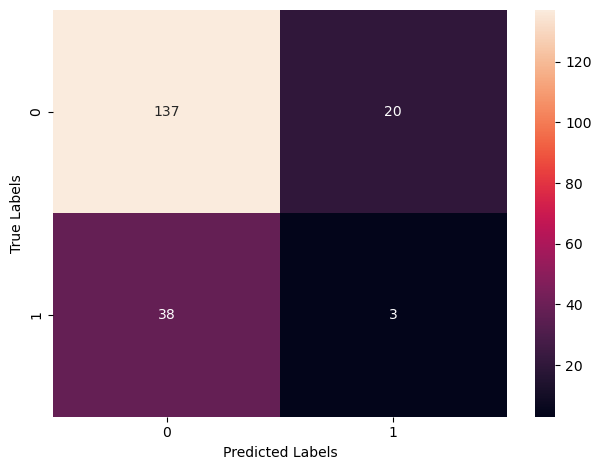

In [63]:
# Define the parameter grid to search
param_grid = {
    'ccp_alpha': [0.0],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = models['Decision Trees']

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = DecisionTreeClassifier(random_state=42, **best_params)
best_rf_model.fit(Xtrain_scaled, ytrain)

# Make predictions on the test set
y_pred = best_rf_model.predict(Xtest_scaled)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)
matrix = confusion_matrix(ytest, y_pred)

# Display results
print("### Best Decision Trees Models ###")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

sns.heatmap(matrix, annot=True, fmt="")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

**Narration**

Hyperparameter increased Accuracy with a lower turnover prediction, proceeded to combine all ML Models Using Ensemble Method

## Ensemble Method

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



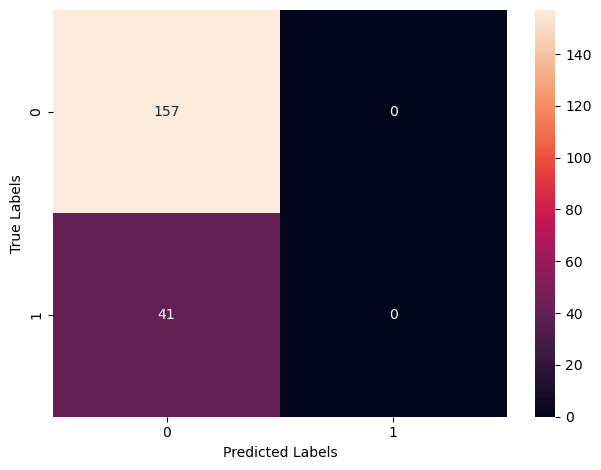

In [61]:
ensemble = VotingClassifier(estimators=[
    ('Random Forests', RandomForestClassifier(random_state=42)),
    ('Decision Trees', DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
], voting='hard')

 # Train the model
ensemble.fit(Xtrain_scaled, ytrain)

# Prediction
ensemble.predict(Xtest_scaled)

# Evaluation
report = classification_report(ytest, ypred)
matrix = confusion_matrix(ytest, ypred)

print(report)
sns.heatmap(matrix, annot=True, fmt="")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

**Narration**

Ensemble Increased Accuracy but did not give any correct prediction on Employee Turnover.  

### Conclusion

The Machine Learning Models did poorly because there was no significant correlation nor pattern between turnover and other features. For this project, Decision Tree would be the best model with **Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}** for Employee Turnover Prediction though with accuracy of 71%. However, we recommend data recollection with improved data collection methods.